Advanced Data Wrangling - IFC Datasets- Tugba Telli

Problem Statement and Proper Explanation: According to an IFC study, what are the investment services projects around the world and how are they distributed in the infrastructure industry, which is a sub-sector of this study? We will do a study to find out which countries have completed the most investment projects and in which sectors they are most active. To answer these questions, we will use two pieces of data from worldbank.org. 

I will use two datasets for gathering multiple datasets with different methods. Firs method will be extracting a dataset via API. I will extract a JSON file for this. And second method will be extracting a dataset wih manual download. When gathering done, I will asses and clean the datasets, merge them and I will ask and answer questions that may arise about the new merged datasets.

Firstly, I'm gonna import the libraries that I will use.

In [3]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

A.1. Gathering Data

A.1.1. Extract a dataset via API (IFC Investment Services Projects in Infrastructure Industry)

I am using an IFC Investment Services Projects in Infrastructure Industry dataset for doing this method. I got this data from worldbank.org. The webpage's link is also: https://financesone.worldbank.org/ifc-investment-services-projects-in-infrastructure-industry/DS01185 So if you want to reach the data by yourself, you can check it here. I copied the JSON link from the website. This JSON file is 705.77 KB. 

This is a JSON file in a list form. And this file contains the rows down below:

1. date_disclosed: Date the project was announced
2. project_name
3. document_type: In this dataset there are 2 document types. ( Summary of Proposed Investment (Disclosure Policy 2006) and Summary of Investment Information (AIP Policy 2012))
4. project_number
5. project_url: The website address
6. product_line: Loan, equity, risk management or guarantee
7. company_name
8. country
9. ifc_country_code: International Finance Corporation unique and global code to read every related data.
10. industry
11. environmental_category
12. department
13. status: Project status that active, complated, pending approval etc.
14. projected_board_date
15. ifc_approval_date: The date that IFC approved
16. ifc_signed_date: The date that IFC signed
17. ifc_invested_date: Date that IFC invested
18. ifc_investment_for_risk_managementmillion__usd: Related with project status
19. ifc_investment_for_guaranteemillion__usd: Related with project status
20. ifc_investment_for_loanmillion__usd: Related with project status
21. ifc_investment_for_equitymillion__usd: Related with project status
22. total_ifc_investment_as_approved_by_boardmillion__usd: Related with project status
23. wb_country_code: Worl Bank unique and global code to read every related data
24. as_of_date

In [4]:
# Using the Python built-in json module to extract JSON data from a request.
book = requests.get("https://financesonefiles.worldbank.org/f-one/DS01185/DS01185.json")
print(book)

<Response [200]>


In [5]:
# I use this method to check whether the response returned from the server after an HTTP request was successful.
book.raise_for_status()

In [6]:
#Get the JSON
json_data = book.json()
print(json_data)

[{'date_disclosed': '11-May-2001', 'project_name': 'Peru Rail', 'document_type': 'Summary of Proposed Investment (Disclosure Policy 2006)', 'project_number': '10024', 'project_url': 'https://disclosures.ifc.org/project-detail/SPI/10024/peru-rail', 'product_line': 'Loan', 'company_name': 'Ferrocarril Transandino S.A.', 'country': 'Peru', 'ifc_country_code': 'PER', 'industry': 'Infrastructure', 'environmental_category': 'B', 'department': 'Gbl Infrastructure &amp; Natural Resources', 'status': 'Completed', 'projected_board_date': '15-Jun-2001', 'ifc_approval_date': '07-May-2002', 'ifc_signed_date': '27-Jun-2002', 'ifc_invested_date': '18-Nov-2002', 'ifc_investment_for_risk_managementmillion__usd': None, 'ifc_investment_for_guaranteemillion__usd': None, 'ifc_investment_for_loanmillion__usd': 9.0, 'ifc_investment_for_equitymillion__usd': None, 'total_ifc_investment_as_approved_by_boardmillion__usd': 9.0, 'wb_country_code': 'PE', 'as_of_date': '15-Sep-2024'}, {'date_disclosed': '06-Apr-2000

In [7]:
# Using this to write JSON data (json_data) to a file named 'book.json' in Python
with open('book.json', 'w') as f: # to create a file named "book_json"
    json.dump(json_data, f) # prints the JSON formatted data named "json_data" to the file object f (i.e. the file 'book.json'). 

In [8]:
# Writing this code to convert the string form JSON data to a Python data. 
json_book_text = json.loads(book.text)
json_book_text

[{'date_disclosed': '11-May-2001',
  'project_name': 'Peru Rail',
  'document_type': 'Summary of Proposed Investment (Disclosure Policy 2006)',
  'project_number': '10024',
  'project_url': 'https://disclosures.ifc.org/project-detail/SPI/10024/peru-rail',
  'product_line': 'Loan',
  'company_name': 'Ferrocarril Transandino S.A.',
  'country': 'Peru',
  'ifc_country_code': 'PER',
  'industry': 'Infrastructure',
  'environmental_category': 'B',
  'department': 'Gbl Infrastructure &amp; Natural Resources',
  'status': 'Completed',
  'projected_board_date': '15-Jun-2001',
  'ifc_approval_date': '07-May-2002',
  'ifc_signed_date': '27-Jun-2002',
  'ifc_invested_date': '18-Nov-2002',
  'ifc_investment_for_risk_managementmillion__usd': None,
  'ifc_investment_for_guaranteemillion__usd': None,
  'ifc_investment_for_loanmillion__usd': 9.0,
  'ifc_investment_for_equitymillion__usd': None,
  'total_ifc_investment_as_approved_by_boardmillion__usd': 9.0,
  'wb_country_code': 'PE',
  'as_of_date': '

In [9]:
# Using this to convert the binary data in JSON format to a data format in Python
json_book_content = json.loads(book.content)
json_book_content

[{'date_disclosed': '11-May-2001',
  'project_name': 'Peru Rail',
  'document_type': 'Summary of Proposed Investment (Disclosure Policy 2006)',
  'project_number': '10024',
  'project_url': 'https://disclosures.ifc.org/project-detail/SPI/10024/peru-rail',
  'product_line': 'Loan',
  'company_name': 'Ferrocarril Transandino S.A.',
  'country': 'Peru',
  'ifc_country_code': 'PER',
  'industry': 'Infrastructure',
  'environmental_category': 'B',
  'department': 'Gbl Infrastructure &amp; Natural Resources',
  'status': 'Completed',
  'projected_board_date': '15-Jun-2001',
  'ifc_approval_date': '07-May-2002',
  'ifc_signed_date': '27-Jun-2002',
  'ifc_invested_date': '18-Nov-2002',
  'ifc_investment_for_risk_managementmillion__usd': None,
  'ifc_investment_for_guaranteemillion__usd': None,
  'ifc_investment_for_loanmillion__usd': 9.0,
  'ifc_investment_for_equitymillion__usd': None,
  'total_ifc_investment_as_approved_by_boardmillion__usd': 9.0,
  'wb_country_code': 'PE',
  'as_of_date': '

In [10]:
# I converted this Json book to a csv file. So we can read the data clear and merge easily with below data.
df_1 = pd.json_normalize(json_data)

# Write the dataframe into the csv file
df_1.to_csv('book_data.csv', index=False)

# Show the first 5 rows
print(df_1.head())

  date_disclosed                        project_name  \
0    11-May-2001                           Peru Rail   
1    06-Apr-2000  San Antonio International Terminal   
2    17-Oct-2000     UF Moldova Distribution Company   
3    27-Dec-1999     C.A. La Electricidad de Caracas   
4    22-Aug-2000                      Tecon Salvador   

                                       document_type project_number  \
0  Summary of Proposed Investment (Disclosure Pol...          10024   
1  Summary of Proposed Investment (Disclosure Pol...          10081   
2  Summary of Proposed Investment (Disclosure Pol...          10113   
3  Summary of Proposed Investment (Disclosure Pol...          10117   
4  Summary of Proposed Investment (Disclosure Pol...          10201   

                                         project_url product_line  \
0  https://disclosures.ifc.org/project-detail/SPI...         Loan   
1  https://disclosures.ifc.org/project-detail/SPI...         Loan   
2  https://disclosures.ifc.or

In [11]:
# For getting data describe
df_1.describe() 

,ifc_investment_for_risk_managementmillion__usd,ifc_investment_for_guaranteemillion__usd,ifc_investment_for_loanmillion__usd,ifc_investment_for_equitymillion__usd,total_ifc_investment_as_approved_by_boardmillion__usd
count,98.000000,12.000000,596.000000,219.000000,713.000000
mean,3.771837,18.587500,51.913238,22.982922,51.285049
std,3.660147,14.650745,53.530871,37.075118,54.665807
min,0.370000,0.000000,0.000000,0.000000,0.750000
25%,1.000000,12.015000,16.987500,4.580000,16.000000
50%,2.600000,15.840000,35.000000,10.000000,32.000000
75%,5.000000,21.479999,66.824997,24.925000,65.000000
max,20.000000,50.000000,450.000000,250.000000,450.000000


In [12]:
# To get information about dataset
df_1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 24 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   date_disclosed                                         768 non-null    object 
 1   project_name                                           768 non-null    object 
 2   document_type                                          768 non-null    object 
 3   project_number                                         768 non-null    object 
 4   project_url                                            768 non-null    object 
 5   product_line                                           768 non-null    object 
 6   company_name                                           768 non-null    object 
 7   country                                                768 non-null    object 
 8   ifc_country_code                                  

In [13]:
# To find out if there is a duplicates in the dataset
if len(df_1) != len(set(df_1)):
    print("There are duplicates.")
else:
    print("There is no duplicates.")

There are duplicates.


In [14]:
# Count of unique values
df_1.nunique()

date_disclosed                                           692
project_name                                             766
document_type                                              2
project_number                                           768
project_url                                              768
product_line                                               5
company_name                                             648
country                                                   93
ifc_country_code                                          77
industry                                                   1
environmental_category                                     7
department                                                36
status                                                     6
projected_board_date                                     623
ifc_approval_date                                        617
ifc_signed_date                                          605
ifc_invested_date       

In [15]:
#Use .duplicated() on the Project Name column to get the rows
df_1[df_1.duplicated(subset=['project_name'])]
df_1.head(3)

,date_disclosed,project_name,document_type,project_number,project_url,product_line,company_name,country,ifc_country_code,industry,...,ifc_approval_date,ifc_signed_date,ifc_invested_date,ifc_investment_for_risk_managementmillion__usd,ifc_investment_for_guaranteemillion__usd,ifc_investment_for_loanmillion__usd,ifc_investment_for_equitymillion__usd,total_ifc_investment_as_approved_by_boardmillion__usd,wb_country_code,as_of_date
0,11-May-2001,Peru Rail,Summary of Proposed Investment (Disclosure Pol...,10024,https://disclosures.ifc.org/project-detail/SPI...,Loan,Ferrocarril Transandino S.A.,Peru,PER,Infrastructure,...,07-May-2002,27-Jun-2002,18-Nov-2002,NaN,NaN,9.0,NaN,9.000000,PE,15-Sep-2024
1,06-Apr-2000,San Antonio International Terminal,Summary of Proposed Investment (Disclosure Pol...,10081,https://disclosures.ifc.org/project-detail/SPI...,Loan,San Antonio Terminal Internacional S.A.,Chile,None,Infrastructure,...,12-May-2000,15-Nov-2000,21-Dec-2000,NaN,NaN,35.0,3.7,38.700001,CL,15-Sep-2024
2,17-Oct-2000,UF Moldova Distribution Company,Summary of Proposed Investment (Disclosure Pol...,10113,https://disclosures.ifc.org/project-detail/SPI...,Loan,RED UNION FENOSA S.A.,Moldova,MDA,Infrastructure,...,20-Dec-2000,19-Nov-2001,06-Feb-2002,NaN,NaN,25.0,NaN,25.000000,MD,15-Sep-2024


In [16]:
# Find the minimum and maximum value in Project Number column
min_value = df_1['project_number'].min()
max_value = df_1['project_number'].max()

print(f"Minimum Project Number: {min_value}")
print(f"Maximum Project Number: {max_value}")

Minimum Project Number: 10024
Maximum Project Number: 9981


In [17]:
# Sum of the null values in each column 
na_counts_1 = df_1.isna().sum()
print(na_counts_1)

date_disclosed                                             0
project_name                                               0
document_type                                              0
project_number                                             0
project_url                                                0
product_line                                               0
company_name                                               0
country                                                    0
ifc_country_code                                          93
industry                                                   0
environmental_category                                     0
department                                                 0
status                                                     0
projected_board_date                                      56
ifc_approval_date                                         52
ifc_signed_date                                           79
ifc_invested_date       

A.2. Assess the First Data (IFC Investment Services Projects in Infrastructure Industry)

A.2.1. Dimension of Data Quality Issues

- Completeness: When we assess this data quality programmatically, looking at the summary of this dataframe returned by .info we can say that there are only 5617 IFC Country code, 6108 Product Line and 6376 company name entries but normally 6383 entries exist for other columns. And also when we check the data with .isna and .sum, we reach that some columns almost has 0 values to read. So we should get rid of them. 
- Validity: The “Date Disclosed” column currently appears in the “object” data type. However, since the content of this column is date information, a more appropriate and efficient data type can be used. Converting this column to the “datetime64” data type will make operations and analysis of dates easier and more effective.
- Accuracy: This data accurately represents the reality it purports to depict. So there is no mistake about this.
- Consistency: When we check the minimum and maximum numbers in Project number column, we can clearly see a consistency issue in number format. Lowest rate has 4 digits but highest value has 6. They should be in same format.
- Uniqueness: There are multiple data entries with the same project name. But we cannot say that it means there is a uniqueness problem due to the difference in project status.


A.2.2 Dimension of Data Tidiness Issues

- Columns containing multiple variables: The “document_type” column contains a long heading like “Summary of Proposed Investment (Disclosure Pol...”. This heading probably contains more than one piece of information:

Document type (e.g. “Summary”)
Subject of the document (e.g. “Proposed Investment”)
The purpose or context of the document (for example, “Disclosure Policy”)

This information can be split into separate columns, for example:

- document_type
- document_subject
- document_context

A.3. Cleaning the First Data (IFC Investment Services Projects in Infrastructure Industry)

First of all, when I look at the sum of null values by every column, I have to remove some columns in this dataset because of the reach the exact data we want. Because when I try to drop all na values from dataset, I got just header rows for result. We need to get rid of all the empty columns in data to reach the right results.  

In [18]:
# Removing these two columns which have the highest null values in
df_1_cleaned = df_1.drop(columns=[
'projected_board_date',
'ifc_approval_date',
'ifc_signed_date',
'ifc_invested_date', 
'ifc_investment_for_risk_managementmillion__usd',
'ifc_investment_for_guaranteemillion__usd',
'ifc_investment_for_loanmillion__usd',
'ifc_investment_for_equitymillion__usd',
'wb_country_code',
'total_ifc_investment_as_approved_by_boardmillion__usd'])

df_1_cleaned.head()

,date_disclosed,project_name,document_type,project_number,project_url,product_line,company_name,country,ifc_country_code,industry,environmental_category,department,status,as_of_date
0,11-May-2001,Peru Rail,Summary of Proposed Investment (Disclosure Pol...,10024,https://disclosures.ifc.org/project-detail/SPI...,Loan,Ferrocarril Transandino S.A.,Peru,PER,Infrastructure,B,Gbl Infrastructure &amp; Natural Resources,Completed,15-Sep-2024
1,06-Apr-2000,San Antonio International Terminal,Summary of Proposed Investment (Disclosure Pol...,10081,https://disclosures.ifc.org/project-detail/SPI...,Loan,San Antonio Terminal Internacional S.A.,Chile,None,Infrastructure,B,Regional Industry INF LAC & EUR,Completed,15-Sep-2024
2,17-Oct-2000,UF Moldova Distribution Company,Summary of Proposed Investment (Disclosure Pol...,10113,https://disclosures.ifc.org/project-detail/SPI...,Loan,RED UNION FENOSA S.A.,Moldova,MDA,Infrastructure,B,Gbl Infrastructure &amp; Natural Resources,Completed,15-Sep-2024
3,27-Dec-1999,C.A. La Electricidad de Caracas,Summary of Proposed Investment (Disclosure Pol...,10117,https://disclosures.ifc.org/project-detail/SPI...,Loan,C.A. La Electricidad de Caracas,"Venezuela, Republica Bolivariana de",None,Infrastructure,B,Gbl Infrastructure &amp; Natural Resources,Completed,15-Sep-2024
4,22-Aug-2000,Tecon Salvador,Summary of Proposed Investment (Disclosure Pol...,10201,https://disclosures.ifc.org/project-detail/SPI...,Loan,Tecon Salvador S/A.,Brazil,BRA,Infrastructure,B,Gbl Infrastructure &amp; Natural Resources,Completed,15-Sep-2024


Secondly, I will try to fix the tidiness issue that we found. Separate the columns that we mention above. The document_type column can be split into document_type, document_subject and document_context. So I will do this

In [19]:

def split_document_type(text):
    parts = text.split(' of ', 1)
    if len(parts) == 2:
        return parts[0], parts[1], ''
    else:
        return text, '', ''

# Splitting the 'document_type' column 
df_1_cleaned[['document_type', 'document_subject', 'document_context']] = df_1_cleaned['document_type'].apply(split_document_type).tolist()

# Reordering 'document_subject' an 'document_context' column
df_1_cleaned['document_subject'] = df_1_cleaned['document_subject'] + ' ' + df_1_cleaned['document_context']
df_1_cleaned['document_subject'] = df_1_cleaned['document_subject'].str.strip()

# Drop the unnecessary paranthesis
df_1_cleaned['document_subject'] = df_1_cleaned['document_subject'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

# Drop the 'document_context' column (it's not necessary anymore))
df_1_cleaned = df_1_cleaned.drop('document_context', axis=1)

# Show the results
print(df_1_cleaned[['document_type', 'document_subject']].head())

  document_type     document_subject
0       Summary  Proposed Investment
1       Summary  Proposed Investment
2       Summary  Proposed Investment
3       Summary  Proposed Investment
4       Summary  Proposed Investment


In [20]:
# Converting Date Disclodes column's type to datetime64 from object
df_1_cleaned['date_disclosed'] = pd.to_datetime(df_1_cleaned['date_disclosed'], format='%d-%b-%Y')

# Reordering the project_number column to align the numbers
df_1_cleaned['project_number'] = df_1_cleaned['project_number'].astype(str).str.zfill(6)

# Rearrangedthe dataset to start from 1 and the old indexes are deleted.
df_1_cleaned.index = range(1, len(df_1_cleaned) + 1)

df_1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date_disclosed          768 non-null    datetime64[ns]
 1   project_name            768 non-null    object        
 2   document_type           768 non-null    object        
 3   project_number          768 non-null    object        
 4   project_url             768 non-null    object        
 5   product_line            768 non-null    object        
 6   company_name            768 non-null    object        
 7   country                 768 non-null    object        
 8   ifc_country_code        675 non-null    object        
 9   industry                768 non-null    object        
 10  environmental_category  768 non-null    object        
 11  department              768 non-null    object        
 12  status                  768 non-null    object    

Last step is fixing the headers. Because our second data header format is uppercase first letter. So we set this data like that. 

In [21]:
# Creating a copied file with a new name to change the header types
df_1_fixed_title = df_1_cleaned.copy()

# Fixing the header types
df_1_fixed_title.columns = df_1_fixed_title.columns.str.replace('_', ' ').str.title()

# Get info to see the headers changes
df_1_fixed_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date Disclosed          768 non-null    datetime64[ns]
 1   Project Name            768 non-null    object        
 2   Document Type           768 non-null    object        
 3   Project Number          768 non-null    object        
 4   Project Url             768 non-null    object        
 5   Product Line            768 non-null    object        
 6   Company Name            768 non-null    object        
 7   Country                 768 non-null    object        
 8   Ifc Country Code        675 non-null    object        
 9   Industry                768 non-null    object        
 10  Environmental Category  768 non-null    object        
 11  Department              768 non-null    object        
 12  Status                  768 non-null    object    

Now we fixed the header columns formats. So we can merge our data with the second dataset as we want.

B.1. Gathering Data

B.1.1 Extract a Dataset via Manual Download (IFC Investment Services Projects)

I got the IFC Investment Services Projects dataset from worldbank.org. This dataset related to what we extracted with API. It has 2.15 mb csv file. It's more comprehensive when we compare with first dataset. This dataset includes the rows belove:

1. Date Disclosed
2. Project Name
3. Document Type
4. Project Number
5. Project Url
6. Product Line
7. Company Name
8. Country
9. IFC Country Code
10. Industry
11. Environmental Category
12. Department
13. Status
14. Projected Board Date
15. IFC Approval Date
16. IFC Signed Date
17. IFC Invested Date
18. IFC investment for Risk Management(Million - USD)
19. IFC investment for Guarantee(Million - USD)
20. IFC investment for Loan(Million - USD)
21. IFC investment for Equity(Million - USD)
22. Total IFC investment as approved by Board(Million - USD)
23. WB Country Code
24. As of Date

I already explained some of the columns meanings above. This dataset is also have the same column names with the first one.

In [22]:
# Load the dataset
data_csv = pd.read_csv('IFC_Investment_Services_Projects.csv')

In [23]:
#Looking at the first few rows
data_csv.head(3)

,Date Disclosed,Project Name,Document Type,Project Number,Project Url,Product Line,Company Name,Country,IFC Country Code,Industry,...,IFC Approval Date,IFC Signed Date,IFC Invested Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date
0,30-Mar-2023,BOP EU Tchad,Summary of Investment Information (AIP Policy ...,45483,https://disclosures.ifc.org/project-detail/SII...,Loan,EXPRESS UNION TCHAD,Chad,CHD,Financial Institutions,...,12-Jun-2023,26-Jun-2023,17-Jul-2024,NaN,NaN,1.03,NaN,1.03,TD,27-Sep-2024
1,04-Dec-2014,Millicom Tchad SA,Summary of Investment Information (AIP Policy ...,34297,https://disclosures.ifc.org/project-detail/SII...,Loan,MOOV AFRICA TCHAD SA,Chad,CHD,"Telecommunications, Media, and Technology",...,30-May-2014,06-Jun-2014,22-Aug-2014,NaN,NaN,76.06,NaN,76.06,TD,27-Sep-2024
2,30-Apr-2013,Chad Clinic,Summary of Investment Information (AIP Policy ...,32607,https://disclosures.ifc.org/project-detail/SII...,Loan,CLINIQUE PROVIDENCE,Chad,CHD,Health and Education,...,06-May-2015,27-May-2015,30-Dec-2015,NaN,NaN,1.38,NaN,1.38,TD,27-Sep-2024


B.2. Assessing the Second Data (IFC Investment Services Projects)

First of all we must do some observation about dataset. I used for this .info to get information about dataset, .describe to describe the cells types, .nunique for count the unique numbers in dataset, .isna and .sum for reach the total number of null values. Then we will interprete the results for assessing data, after that, clear the mistakes to get more usefull dataset. 

In [24]:
#Get information about the dataset
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6383 entries, 0 to 6382
Data columns (total 24 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Date Disclosed                                            6383 non-null   object 
 1   Project Name                                              6383 non-null   object 
 2   Document Type                                             6383 non-null   object 
 3   Project Number                                            6383 non-null   int64  
 4   Project Url                                               6383 non-null   object 
 5   Product Line                                              6108 non-null   object 
 6   Company Name                                              6376 non-null   object 
 7   Country                                                   6383 non-null   object 
 8   IFC Country Code  

In [25]:
#Describe the dataset
data_csv.describe()

,Project Number,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD)
count,6383.000000,185.000000,341.000000,4529.000000,2219.000000,6109.000000
mean,33724.144133,5.815027,102.013196,44.526012,22.179450,46.936785
std,44663.534461,12.112993,175.137527,62.721805,42.102513,78.802143
min,3402.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,24054.500000,1.000000,7.200000,10.000000,3.000000,10.000000
50%,31367.000000,2.500000,25.000000,25.000000,10.000000,24.600000
75%,40688.500000,5.280000,100.000000,50.000000,24.685000,50.000000
max,574447.000000,100.000000,1500.000000,1000.000000,1003.000000,1500.000000


In [26]:
# Finding the minimum and maximum values in Project Number column
min_value = data_csv['Project Number'].min()
max_value = data_csv['Project Number'].max()

print(f"Minimum Project Number: {min_value}")
print(f"Maximum Project Number: {max_value}")

Minimum Project Number: 3402
Maximum Project Number: 574447


In [27]:
#Find number of unique values using .unique()
data_csv.nunique()

Date Disclosed                                              3861
Project Name                                                6322
Document Type                                                  2
Project Number                                              6334
Project Url                                                 6349
Product Line                                                   4
Company Name                                                4818
Country                                                      167
IFC Country Code                                             121
Industry                                                      10
Environmental Category                                         8
Department                                                   123
Status                                                         6
Projected Board Date                                        3059
IFC Approval Date                                           3276
IFC Signed Date          

In [28]:
# See the total null value for every column
na_counts = data_csv.isna().sum()
print(na_counts)

Date Disclosed                                                 0
Project Name                                                   0
Document Type                                                  0
Project Number                                                 0
Project Url                                                    0
Product Line                                                 275
Company Name                                                   7
Country                                                        0
IFC Country Code                                             766
Industry                                                       0
Environmental Category                                         0
Department                                                     0
Status                                                         0
Projected Board Date                                         889
IFC Approval Date                                            217
IFC Signed Date          

In [29]:
# Find out the total rows number
total_rows = len(data_csv)

# Counting the not null values for every column
non_na_counts = data_csv.notna().sum()
print(f"Total rows number: {total_rows}")
print("\nNot NaN value numbers in every column:")
print(non_na_counts)

Total rows number: 6383

Not NaN value numbers in every column:
Date Disclosed                                              6383
Project Name                                                6383
Document Type                                               6383
Project Number                                              6383
Project Url                                                 6383
Product Line                                                6108
Company Name                                                6376
Country                                                     6383
IFC Country Code                                            5617
Industry                                                    6383
Environmental Category                                      6383
Department                                                  6383
Status                                                      6383
Projected Board Date                                        5494
IFC Approval Date         

B.2.1. Dimension of Data Quality Issues

- Completeness: When we check the data with .info, we can clearly see there are only 185 not null IFC investment for risk management (million -USD) and 341 investment guarantee columns, but highest not null value is 6383. This two column makes an issue about reading the data so I would remove these two columns. Then some columns like IFC country code, invested date, signed date, product line have also null values. This is a completeness issue and we should clear the null cells. 
- Validity: When we checked the data with .info, we see date columns types as object. They can converted to date datatypes.
- Accuracy: We can not say we can see an accuracy issue in this dataset. 
- Consistency: As you can see the min and max project number digits are not matching. Minimum number has 4 digit but maximum has 6. This may be a consistency issue and should be fixed.
- Uniqueness: There are some columns that not have unique values. But we can not say that this is an issue or mistake for this dataset.

B.2.2 Dimension of Data Tidiness Issues

- Variables are stored in both rows and column: This problem is seen in the “IFC investment for” columns in the table. The table has the following columns:

    - IFC investment for Risk Management(Million - USD)
    - IFC investment for Guarantee(Million - USD)
    - IFC investment for Loan(Million - USD)
    - IFC investment for Equity(Million - USD)

    This structure places investment types (Risk Management, Guarantee, Loan, Equity) in column headings, but these values are actually different categories of one variable. I will create a new column called “Investment Type” then create another column called “Investment Amount (Million - USD)”. After that, I'm gonna dreate a separate row for each investment type to fix this issue.


B.3. Cleaning The Second Data (IFC Investment Services Projects)

I'm gonna clean this dataset based on assessment results. And also add some other regulations like for example when we look the data with .head the firs row after the title row starts with 0, 1, 2,... I will add index for starting the sorting of the first row at number 1. Also when wee look the "Project Url" column, it has a long webpage link and this looks eye tiring. I will make it shorter for a neater look.    

In [38]:
# Removing these two columns which have the highest null values in to fix the completeness issue.
df = data_csv.drop(columns=['IFC investment for Risk Management(Million - USD)', 'IFC investment for Guarantee(Million - USD)'])

# Rename as "df_cleaned" and drop all other na values from dataset. This step is also for data tidiness issue about Inconsistent data types. 
df_cleaned = df.dropna() 

# Converting Date Disclodes column's type to datetime64 from object for fixing the validity issue.
# First select all the date columns
date_columns = [
    'Projected Board Date', 
    'IFC Approval Date', 
    'IFC Signed Date', 
    'IFC Invested Date', 
]

for col in date_columns:
    df_cleaned[col] = pd.to_datetime(df_cleaned [col], errors='coerce')

#To fix the consistency issue, set the digits to six number.
# Convert the "Project Number" column into the string
df_cleaned['Project Number'] = df_cleaned['Project Number'].astype(str)

# Filling each value with zeros to 6 digits
df_cleaned['Project Number'] = df_cleaned['Project Number'].str.zfill(6)

# shortened the long link in the homepage column and convert the datatype as string from object.
df_cleaned['Project Url'] = df_cleaned['Project Url'].astype(str).apply(lambda x: x[:7] + '****' if isinstance(x, str) else x) 

# Yatırım türlerini ve değerlerini yeniden düzenleme
investment_columns = [
    'IFC investment for Loan(Million - USD)',
    'IFC investment for Equity(Million - USD)'
]

# Now I want to fix the tidiness issue in this dataset. Reshape, reorder, filter adding index steps will be related with this issue type.
# Reshape the dataset
df_melted = df_cleaned.melt(
    id_vars=[col for col in df_cleaned.columns if col not in investment_columns],
    value_vars=investment_columns,
    var_name='Investment Type',
    value_name='Investment Amount (Million - USD)'
)

# Reorder the 'Investment Type' column
df_melted['Investment Type'] = df_melted['Investment Type'].map({
    'IFC investment for Loan(Million - USD)': 'Loan',
    'IFC investment for Equity(Million - USD)': 'Equity'
})

# Filter the Investment amounts which are not 0. 
df_tidy = df_melted[df_melted['Investment Amount (Million - USD)'] != 0].reset_index(drop=True)

# With this code, the indexes in the data set are rearranged to start from zero and the old indexes are deleted.
df_tidy.index = range(1, len(df_tidy) + 1)

# Show the results
df_tidy.info()
df_tidy.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 1 to 962
Data columns (total 22 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   Date Disclosed                                            962 non-null    object        
 1   Project Name                                              962 non-null    object        
 2   Document Type                                             962 non-null    object        
 3   Project Number                                            962 non-null    object        
 4   Project Url                                               962 non-null    object        
 5   Product Line                                              962 non-null    object        
 6   Company Name                                              962 non-null    object        
 7   Country                                     

C:\Users\ttelli\AppData\Local\Temp\ipykernel_17660\857663705.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_datetime(df_cleaned [col], errors='coerce')
C:\Users\ttelli\AppData\Local\Temp\ipykernel_17660\857663705.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_datetime(df_cleaned [col], errors='coerce')
C:\Users\ttelli\AppData\Local\Temp\ipykernel_17660\857663705.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,Date Disclosed,Project Name,Document Type,Project Number,Project Url,Product Line,Company Name,Country,IFC Country Code,Industry,...,Status,Projected Board Date,IFC Approval Date,IFC Signed Date,IFC Invested Date,Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date,Investment Type,Investment Amount (Million - USD)
1,22-May-2009,NFD Agro,Summary of Proposed Investment (Disclosure Pol...,027644,https:/****,Loan,NFD Agro Limited,Paraguay,PAR,Agribusiness and Forestry,...,Active,2009-06-22,2009-06-28,2009-06-29,2009-12-16,20.00,PY,27-Sep-2024,Loan,15.0
2,18-Dec-2019,Ceramic Tile AF,Summary of Investment Information (AIP Policy ...,042507,https:/****,Loan,TILEMASTER INVESTMENT LIMITED,Senegal,SEN,Manufacturing,...,Active,2020-02-28,2020-04-06,2020-06-30,2023-07-24,142.00,SN,27-Sep-2024,Loan,115.0
3,11-Jun-2013,Tobene,Summary of Investment Information (AIP Policy ...,033841,https:/****,Loan,TOBENE POWER SA,Senegal,SEN,Infrastructure,...,Active,2013-10-17,2013-12-19,2014-08-06,2015-09-03,46.22,SN,27-Sep-2024,Loan,41.4


C.1. Merge The Datasets

I will merge these two dataset from IFC Country Code column. Because IFC country codes are universal and it's in both datasets.

In [39]:
merged_df = pd.merge(df_1_fixed_title, df_cleaned, left_on="Ifc Country Code", right_on="IFC Country Code", how="inner")

merged_df.head(3)

,Date Disclosed_x,Project Name_x,Document Type_x,Project Number_x,Project Url_x,Product Line_x,Company Name_x,Country_x,Ifc Country Code,Industry_x,...,Status_y,Projected Board Date,IFC Approval Date,IFC Signed Date,IFC Invested Date,IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date
0,2001-05-11,Peru Rail,Summary,010024,https://disclosures.ifc.org/project-detail/SPI...,Loan,Ferrocarril Transandino S.A.,Peru,PER,Infrastructure,...,Active,2023-06-15,2023-08-04,2023-11-14,2023-11-16,25.0,0.0,25.0,PE,27-Sep-2024
1,2001-05-11,Peru Rail,Summary,010024,https://disclosures.ifc.org/project-detail/SPI...,Loan,Ferrocarril Transandino S.A.,Peru,PER,Infrastructure,...,Active,2019-11-17,2020-01-24,2020-08-10,2020-08-24,21.0,0.0,21.0,PE,27-Sep-2024
2,2001-05-11,Peru Rail,Summary,010024,https://disclosures.ifc.org/project-detail/SPI...,Loan,Ferrocarril Transandino S.A.,Peru,PER,Infrastructure,...,Completed,2007-07-02,2007-07-19,2007-07-23,2007-07-26,30.0,10.0,40.0,PE,27-Sep-2024


In [40]:
# To see the total null values in every column
merged_df.isna().sum()

Date Disclosed_x                                            0
Project Name_x                                              0
Document Type_x                                             0
Project Number_x                                            0
Project Url_x                                               0
Product Line_x                                              0
Company Name_x                                              0
Country_x                                                   0
Ifc Country Code                                            0
Industry_x                                                  0
Environmental Category_x                                    0
Department_x                                                0
Status_x                                                    0
As Of Date                                                  0
Document Subject                                            0
Date Disclosed_y                                            0
Project 

The new merged dataset has zero null values as you can see above.

C.2. Ask and Answer Two Questions With Data Visualization

Question 1: What is the ranking of the top 10 countries with the most projects in completed status? Let's show it with a bar chart.

C:\Users\ttelli\AppData\Local\Temp\ipykernel_17660\3883649269.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=completed_counts.index, y=completed_counts.values, palette='viridis')


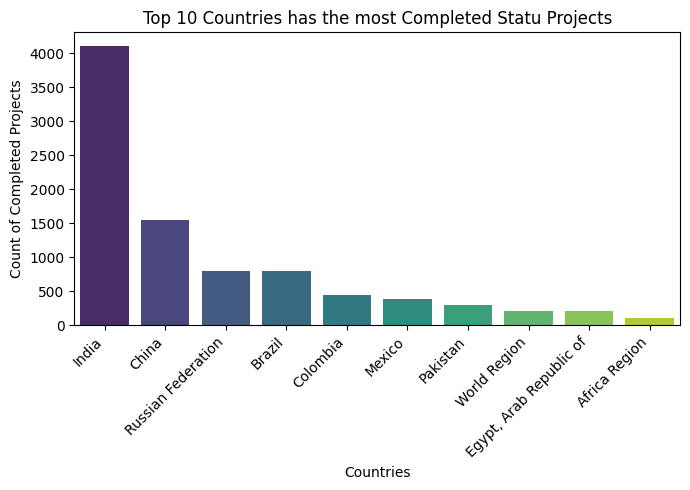

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the data: Choose the project only in "Completed" status
completed_projects = merged_df[merged_df['Status_y'] == 'Completed']

# Counting the completed projects by countries 
completed_counts = completed_projects['Country_x'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(7, 5))
sns.barplot(x=completed_counts.index, y=completed_counts.values, palette='viridis')

# Titles and tags
plt.title('Top 10 Countries has the most Completed Statu Projects')
plt.xlabel('Countries')
plt.ylabel('Count of Completed Projects')

# Rotate the table for reading the country names
plt.xticks(rotation=45, ha='right')

# Show the graph
plt.tight_layout()
plt.show()

By looking at the chart, we can say that the top 10 countries with the most completed projects are as follows:
1. India
2. China
3. Russia
4. Brazil
5. Colombia
6. Mexico
7. Pakistan
8. World Region
9. Egypt
10. Africa Region

Question 2: In which departments are the projects in these top 10 countries with Completed status? Let's find it by drawing a scatter plot

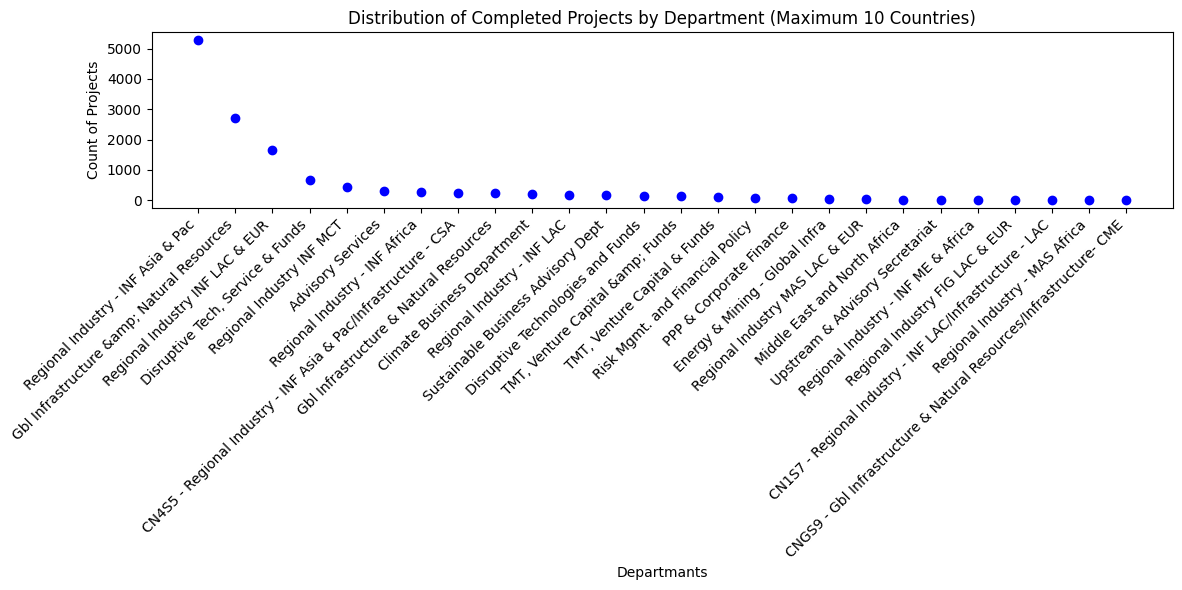

In [42]:
# Select completed projects with top 10 countries
top_completed_countries = merged_df[merged_df['Status_y'] == 'Completed']['Country_x'].value_counts().head(10).index

# Filter the projects of these countries and get the number of departments
department_distribution = merged_df[merged_df['Country_x'].isin(top_completed_countries)]['Department_x'].value_counts()

# Create Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(department_distribution.index, department_distribution.values, color='blue')

# GTitles and tags
plt.title('Distribution of Completed Projects by Department (Maximum 10 Countries)')
plt.xlabel('Departmants')
plt.ylabel('Count of Projects')

# Rotate the table for readability of department names
plt.xticks(rotation=45, ha='right')

# Show the Scatterplot
plt.tight_layout()
plt.show()


By looking at the scatter chart, we can say that the top 5 departmenst with the top 10 countries that have most completed projects are as follows:
1. Regional Industry - INF Asia & Pac
2. Gbl Infrastructure & amp; Natural Resources
3. Regional Industry INF LAC & EUR
4. Disruptive Tech, Servise & Funds 
5. Regional Industry INF MCT

In [43]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html ifc_dataset-1.ipynb

[NbConvertApp] Converting notebook ifc_dataset-1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 3020294 bytes to ifc_dataset-1.html


In [44]:
# Save the modified DataFrame to a new CSV file
merged_df.to_csv('ifc_tugba.csv', index=False)

If I had enough time, I would look for the accuracy data quality issue to find out whether all the data in the dataset is correct and ensure the data capture accurate information. As a research question, I would compare the company name by project status and date disclosed to check which companies have the most stability. 